## Import Basic Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import os , joblib ,missingno

#Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

# metrics
from sklearn.metrics import mean_squared_error, r2_score

#Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

#Xgboost
from xgboost import XGBRegressor

## Load the Dataset

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5533,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN
19047,-121.83,38.45,15.0,5115.0,776.0,2540.0,794.0,4.8611,146400.0,INLAND
13536,-117.31,34.15,7.0,5747.0,1307.0,2578.0,1147.0,3.3281,122200.0,INLAND
19378,-120.69,37.77,46.0,431.0,86.0,239.0,80.0,3.3182,282100.0,INLAND
14213,-117.05,32.69,21.0,991.0,210.0,695.0,203.0,3.6250,144300.0,NEAR OCEAN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [9]:
df['total_bedrooms'].isnull().sum()

207

<AxesSubplot:>

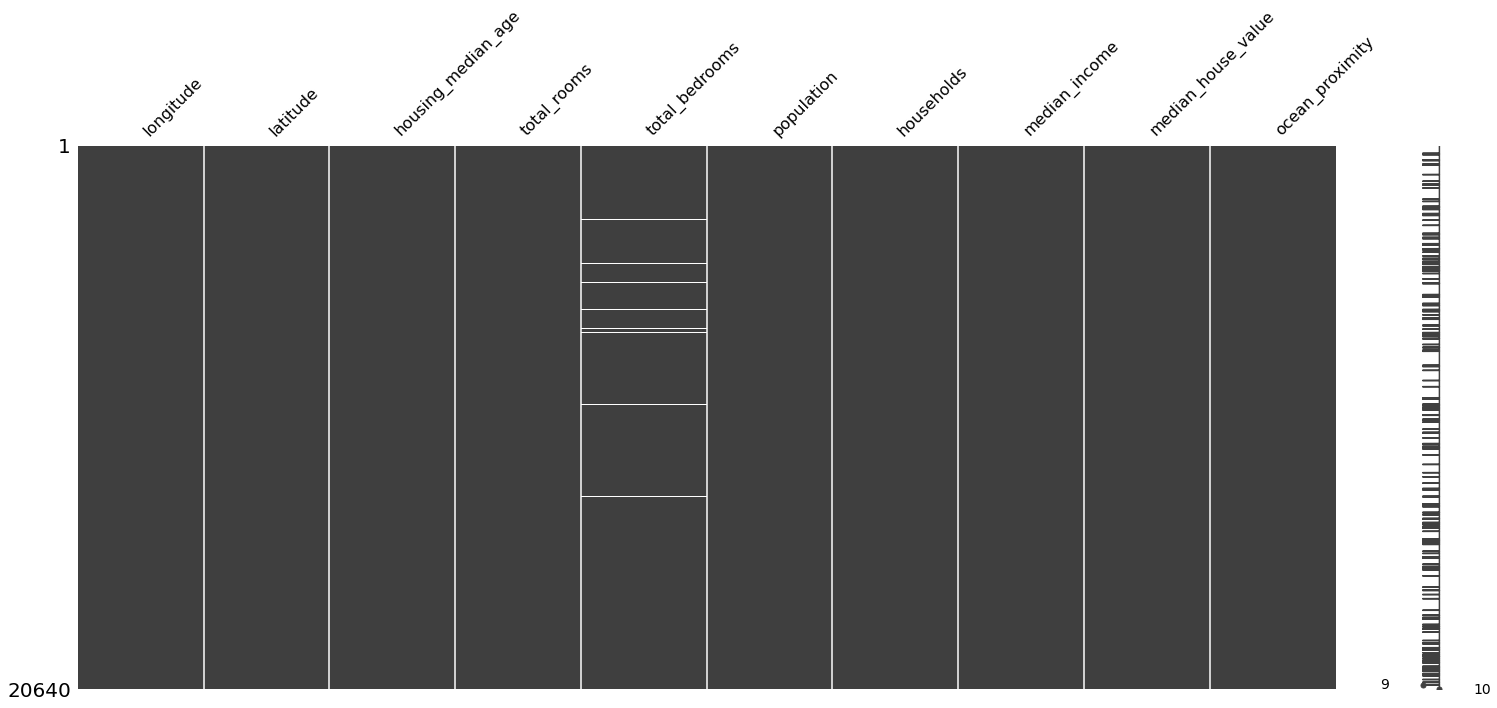

In [10]:
missingno.matrix(df)

* >Comment: It seems that Dataset is a contains 20640 instances and only 207 null values in total_bedrooms feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature**


## Exploratory Data Analysis(EDA) && Visualization

In [11]:
ocean_values = df['ocean_proximity'].unique()
replicates = df['ocean_proximity'].value_counts()


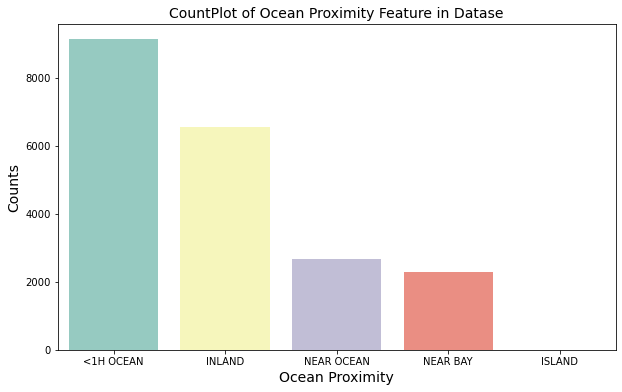

In [12]:
#ploting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data = df, order= replicates.index , palette="Set3" )
plt.title('CountPlot of Ocean Proximity Feature in Datase', fontsize=14,c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

In [13]:
#Replace the (<1H OCEAN) to (1H OCEAN)
df['ocean_proximity'] = df['ocean_proximity'].replace('<1H OCEAN','1H OCEAN')
df['ocean_proximity'].unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

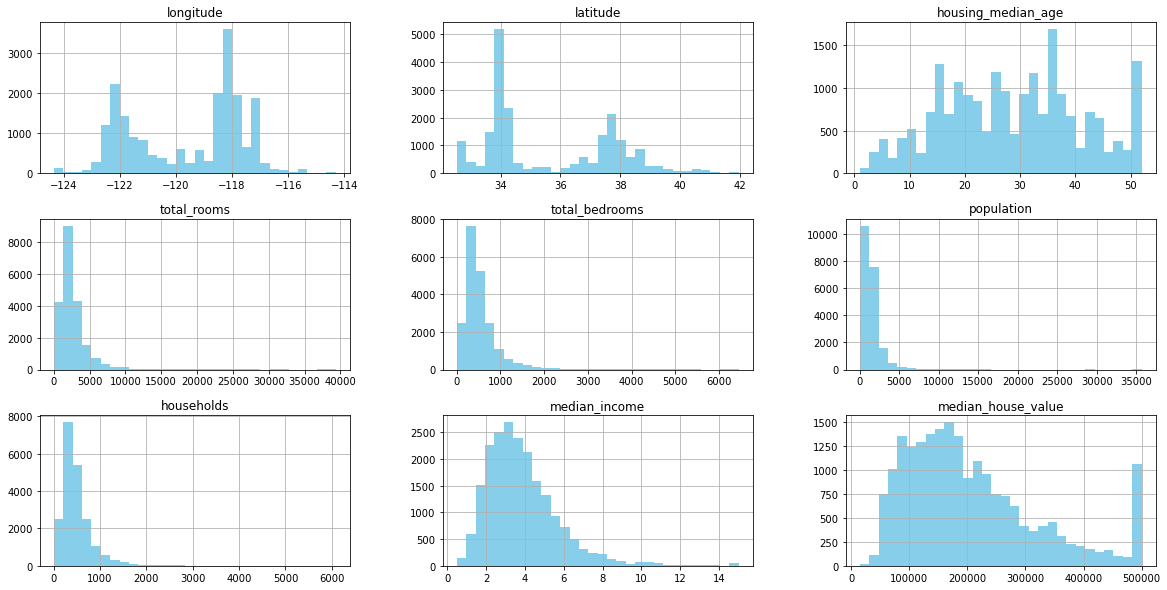

In [14]:
#Histogram Distr. of Numerical Features in Dataset
df.hist(bins=30, figsize=(20,10), color = "skyblue")
plt.show()

In [15]:
df.corr().style.background_gradient(cmap='PuBu')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


*  >Comment: It seems that the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated

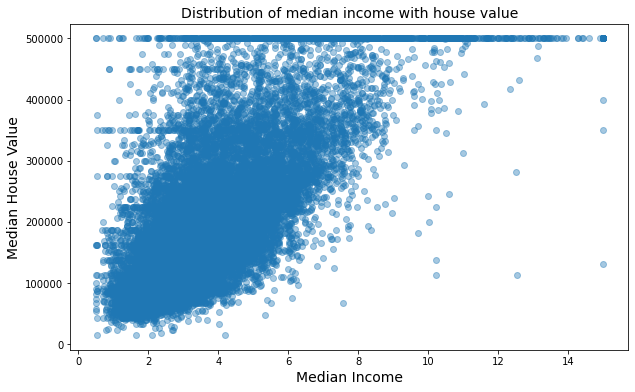

In [16]:
## Scatterplot with important Feature (medina_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.4)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

***median_income is the most important feature***


In [17]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

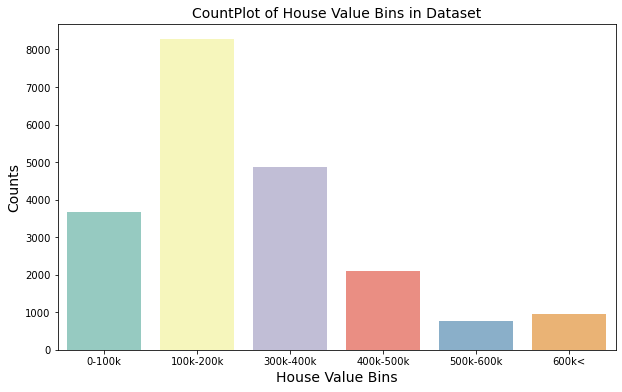

In [18]:
#convert (median_house_value) into chunks (bins)
house_value_bins = pd.cut(x=df['median_house_value'], bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])
#plot the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins,palette="Set3")
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

In [19]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

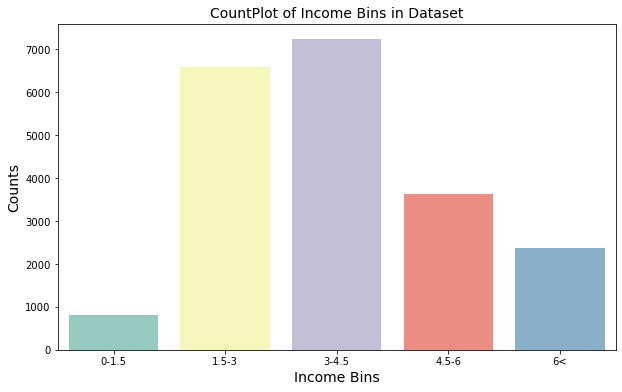

In [20]:
# let's do the same with (median_income)
income_bins = pd.cut(x=df['median_income'], bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf], 
                     labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])


#plot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins,palette="Set3" )
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show() 

* >Comment: It seems that the (<1H ocean) is about the half of the dataset the data is biased to this category, someone can think to split the data according to this column using (startified) method if we found that this column is very important, we will discuss that later, Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later, Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical**


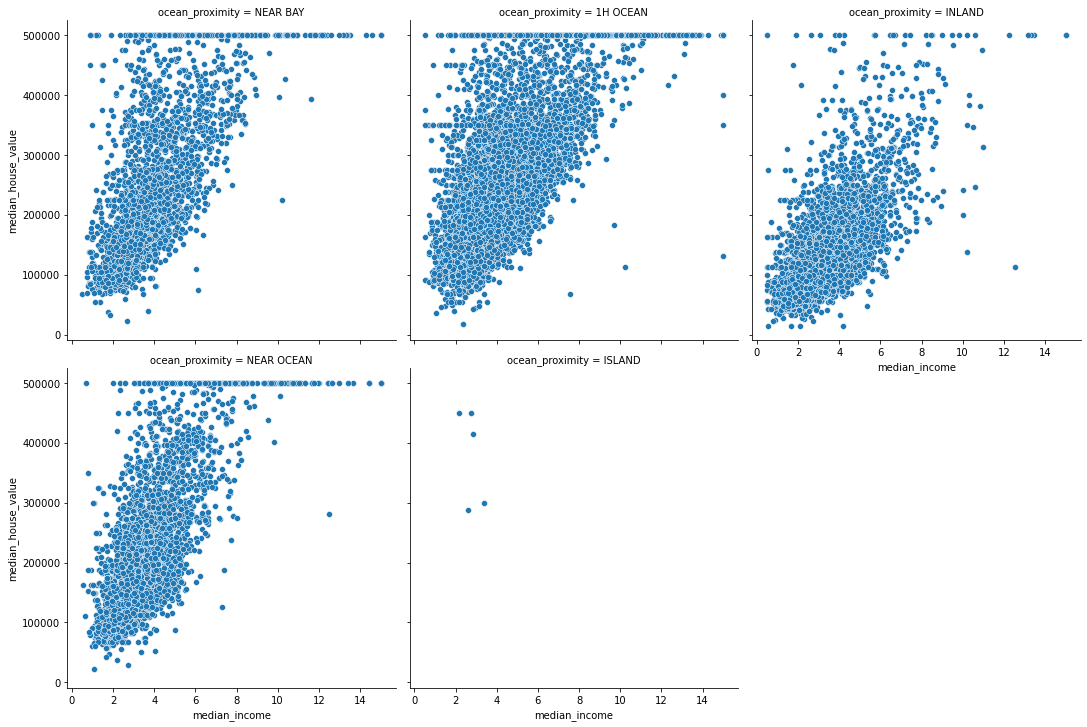

In [21]:
#plot (median_income) & (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income', y='median_house_value', data=df, kind='scatter',col='ocean_proximity', col_wrap=3)


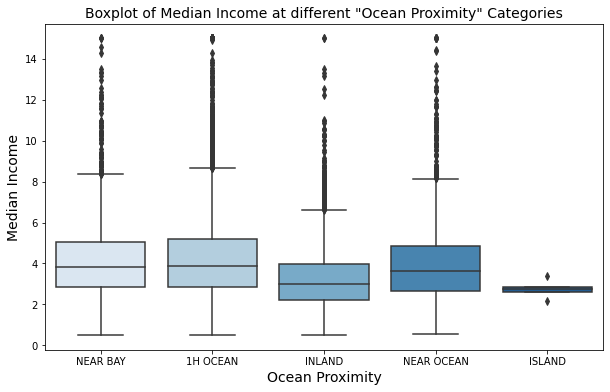

In [22]:
#Draw the BoxPlot of the (median_income) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_income', data=df, x='ocean_proximity', palette="Blues")
plt.title('Boxplot of Median Income at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

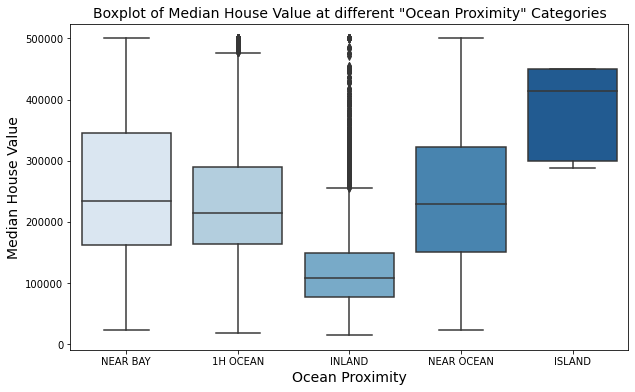

In [23]:
#plot the BoxPlot for (median_house_value) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', data=df, x='ocean_proximity', palette="Blues")
plt.title('Boxplot of Median House Value at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

* >Comment: It seems that the Distribution of median_income is almost the same at ocean_proximity categories, Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense**

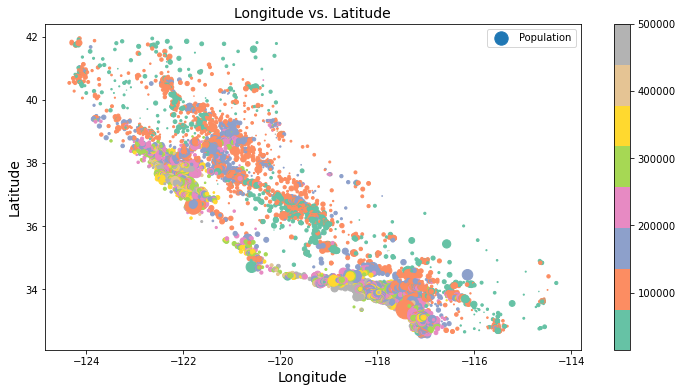

In [24]:
## ScatterPlot for (longitude & Latitude), and add (population) as size of point, and the color as (median_house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(x=df['longitude'], y=df['latitude'],s=df['population']/100, c=df['median_house_value'], 
                 cmap=plt.get_cmap('Set2'), label='Population')
plt.colorbar(sc)   ## colorbar
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

## Data Processing

#### Numerical Variable

In [25]:
#Separete the columns to(numerical or categorical)
num_cols = [col for col in df.columns if df[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in df.columns if df[col].dtype not in ['float32', 'float64', 'int32', 'int64']]


print('Numerical Columns: ', num_cols)
print('+++++++++++++++++++++++++++++++++++++++++')
print('Categorical Columns: ', categ_cols)

Numerical Columns:  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
+++++++++++++++++++++++++++++++++++++++++
Categorical Columns:  ['ocean_proximity']


In [26]:
#Fill the null using (median)
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['total_bedrooms'] =imp.fit_transform(df[['total_bedrooms']])

In [27]:
pd.DataFrame(df['total_bedrooms']).isna().sum()

total_bedrooms    0
dtype: int64

In [28]:
#Try to make some Feature Engineering 
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedroms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedroms_per_rooms         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [30]:
#check the correlation again
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.233303
Name: median_house_value, dtype: float64

In [31]:
df[num_cols].isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [32]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols]) 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedroms_per_rooms         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


#### Categorical

In [34]:
#use OneHotEncoder for ['ocean_proximity']
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['ocean_proximity']]).toarray())
df = df.join(encoder_df)

In [35]:
df.drop('ocean_proximity', axis=1, inplace=True)

In [37]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedroms_per_rooms,population_per_household,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0


## Split the Dataset

In [40]:
#Split the Dataset to Feature & Target
X = df.drop(columns=['median_house_value'], axis=1)   ### Features
y = df['median_house_value']   ### target

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

In [42]:
#Check Shapes of these Sets
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (17544, 16)
y_train shape:  (17544,)
X_test shape:  (3096, 16)
y_test shape:  (3096,)


## Building ML models
**1- Linear Regression**

In [43]:
# built the model
lin_reg = LinearRegression()

In [44]:
#train the model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [51]:
## Check scores of this Model (RMSE) using (cross_val_score)
mse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores_lin = -1 * mse_scores_lin
rmse_scores_lin = np.sqrt(mse_scores_lin)
rmse_scores_lin.mean()

67880.14257788888

In [52]:
y_pred_lin =  cross_val_predict(estimator=lin_reg, X=X_train, y=y_train, 
                               cv=5, method='predict', n_jobs=-1)
y_pred_lin

array([184295.23244419, 230100.88200316, 145096.26649771, ...,
       195094.05173242, 278871.44475451, 272476.85764425])

In [53]:
np.sqrt(mean_squared_error(y_train,y_pred_lin))

67898.88872785727

In [54]:
print (f'Train accuracy :: {lin_reg.score(X_train,y_train)*100} %')
print (f'Test  accuracy :: {lin_reg.score(X_test,y_test)*100} %')

Train accuracy :: 65.77509701605881 %
Test  accuracy :: 57.90284623815729 %


**2-Ridge (Regularized Version of LinearRegression)**

In [67]:
## Define Ridge Model 
ridge_reg = Ridge(alpha=0.9, solver='cholesky')
ridge_reg.fit(X_train, y_train)  ## train the model

Ridge(alpha=0.9, solver='cholesky')

In [68]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_ridge = cross_val_score(estimator=ridge_reg, X=X_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_ridge = -1 * rmse_scores_ridge   ## we want it positive
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)
print(f'RMSE Scores Using Ridge --- {np.round(rmse_scores_ridge, 4)}')
print(f'Mean of RMSE Scores Using Ridge --- {rmse_scores_ridge.mean():.4f}')

RMSE Scores Using Ridge --- [66468.5715 69234.8414 66349.2983 67018.3627 70332.4073]
Mean of RMSE Scores Using Ridge --- 67880.6962


In [69]:
## Get Prediction using (cross_val_predict)
y_pred_ridge = cross_val_predict(estimator=ridge_reg, X=X_train, y=y_train, cv=5, method='predict', n_jobs=-1)
rmse_pred_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print(f'RMSE after prediction Using Ridge --- {rmse_pred_ridge:.4f}')  

RMSE after prediction Using Ridge --- 67899.5969


In [70]:
print (f'Train accuracy :: {ridge_reg.score(X_train,y_train)*100} %')
print (f'Test  accuracy :: {ridge_reg.score(X_test,y_test)*100} %')

Train accuracy :: 65.77305480150963 %
Test  accuracy :: 58.22382489416589 %


**3-Lasso (Regularized Version of LinearRegression)**

In [71]:
## Define Lasso Model 
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(X_train, y_train)  ## train the model 

Lasso(alpha=1, max_iter=100000)

In [72]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_lasso = cross_val_score(estimator=lasso_reg, X=X_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_lasso = -1 * rmse_scores_lasso   ## we want it positive
rmse_scores_lasso = np.sqrt(rmse_scores_lasso)
print(f'RMSE Scores Using Lasso --- {np.round(rmse_scores_lasso, 4)}')
print(f'Mean of RMSE Scores Using Lasso --- {rmse_scores_lasso.mean():.4f}')

RMSE Scores Using Lasso --- [66469.2807 69223.5217 66340.4448 67044.5586 70322.5597]
Mean of RMSE Scores Using Lasso --- 67880.0731


In [73]:
## Get Prediction using (cross_val_predict)
y_pred_lasso = cross_val_predict(estimator=lasso_reg, X=X_train, y=y_train, cv=5, method='predict', n_jobs=-1)
rmse_pred_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso))
print(f'RMSE after prediction Using Lasso --- {rmse_pred_lasso:.4f}')  

RMSE after prediction Using Lasso --- 67898.8301


In [74]:
print (f'Train accuracy :: {lasso_reg.score(X_train,y_train)*100} %')
print (f'Test  accuracy :: {lasso_reg.score(X_test,y_test)*100} %')

Train accuracy :: 65.77506449723752 %
Test  accuracy :: 57.925526890758206 %


**4-KNN**
Low n_neighbors -> Overfitting &  High n_neighbors ->  Underfitting


In [108]:
#Define model
knn_reg = KNeighborsRegressor(n_neighbors=8 ,p=1,  metric='minkowski', weights='uniform')
knn_reg.fit(X_train, y_train)  ## train the model

KNeighborsRegressor(n_neighbors=8, p=1)

In [109]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_knn = cross_val_score(estimator=knn_reg, X=X_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1) 
rmse_scores_knn = -1 * rmse_scores_knn   ## we want it positive
rmse_scores_knn = np.sqrt(rmse_scores_knn)
print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')

RMSE Scores Using KNN --- [94728.274  94285.7049 94053.7392 94403.7132 94990.8564]
Mean of RMSE Scores Using KNN --- 94492.4575


In [110]:
## Get Prediction using (cross_val_predict)
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train, y=y_train, cv=5, method='predict', n_jobs=-1)
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}') 

RMSE after prediction Using KNN --- 94493.0081


In [111]:
print (f'Train accuracy :: {knn_reg.score(X_train,y_train)*100} %')
print (f'Test  accuracy :: {knn_reg.score(X_test,y_test)*100} %')

Train accuracy :: 48.79567111677129 %
Test  accuracy :: 31.42889862616427 %


**Random Forest**

In [112]:
# Using RF
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1)
forest_reg.fit(X_train, y_train)  ## train

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [119]:
## Using RandomizedSearchCV
params_best_forest = {'n_estimators': np.arange(100, 500, 50), 
                      'max_depth': np.arange(4, 20, 2), 
                      'max_samples': [0.7, 0.8, 0.9, 1]}

## Intialize
search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='neg_mean_squared_error', 
                                          cv=5, verbose=6, random_state=422)
search_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=150, max_samples=0.7, max_depth=18 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=150, max_samples=0.7, max_depth=18, score=-2394024158.730, total=   6.3s
[CV] n_estimators=150, max_samples=0.7, max_depth=18 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  n_estimators=150, max_samples=0.7, max_depth=18, score=-2778085919.675, total=   3.2s
[CV] n_estimators=150, max_samples=0.7, max_depth=18 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


[CV]  n_estimators=150, max_samples=0.7, max_depth=18, score=-2647575902.105, total=   3.0s
[CV] n_estimators=150, max_samples=0.7, max_depth=18 .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s remaining:    0.0s


[CV]  n_estimators=150, max_samples=0.7, max_depth=18, score=-2419636283.304, total=   3.8s
[CV] n_estimators=150, max_samples=0.7, max_depth=18 .................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.6s remaining:    0.0s


[CV]  n_estimators=150, max_samples=0.7, max_depth=18, score=-2555645105.510, total=   4.0s
[CV] n_estimators=250, max_samples=0.9, max_depth=12 .................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.5s remaining:    0.0s


[CV]  n_estimators=250, max_samples=0.9, max_depth=12, score=-2494311050.258, total=   5.9s
[CV] n_estimators=250, max_samples=0.9, max_depth=12 .................
[CV]  n_estimators=250, max_samples=0.9, max_depth=12, score=-2882672258.548, total=   5.9s
[CV] n_estimators=250, max_samples=0.9, max_depth=12 .................
[CV]  n_estimators=250, max_samples=0.9, max_depth=12, score=-2755746046.298, total=   5.9s
[CV] n_estimators=250, max_samples=0.9, max_depth=12 .................
[CV]  n_estimators=250, max_samples=0.9, max_depth=12, score=-2510780186.238, total=   5.8s
[CV] n_estimators=250, max_samples=0.9, max_depth=12 .................
[CV]  n_estimators=250, max_samples=0.9, max_depth=12, score=-2675704711.694, total=   5.7s
[CV] n_estimators=450, max_samples=0.9, max_depth=4 ..................
[CV]  n_estimators=450, max_samples=0.9, max_depth=4, score=-4362957030.690, total=   4.3s
[CV] n_estimators=450, max_samples=0.9, max_depth=4 ..................
[CV]  n_estimators=450,

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.1min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [120]:
## Get the best Params
best_foresr_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)

best_foresr_params --  {'n_estimators': 400, 'max_samples': 0.9, 'max_depth': 18}


In [121]:
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

best_forest --  RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      n_jobs=-1, random_state=42)


In [130]:
rmse_scores_tuned_forest = cross_val_score(estimator=best_forest, X=X_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_forest = -1 * rmse_scores_tuned_forest   ## we want it positive
rmse_scores_tuned_forest = np.sqrt(rmse_scores_tuned_forest)
print(f'RMSE Scores Using Tuned RandomForest --- {np.round(rmse_scores_tuned_forest, 4)}')
print(f'Mean of RMSE Scores Using Tuned RandomForest --- {rmse_scores_tuned_forest.mean():.4f}')


RMSE Scores Using Tuned RandomForest --- [48557.3302 52268.5098 51241.7721 48859.3718 50268.5145]
Mean of RMSE Scores Using Tuned RandomForest --- 50239.0997


In [132]:
y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=X_train, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
rmse_pred_tuned_forest = np.sqrt(mean_squared_error(y_train, y_pred_tuned_forest))
print(f'RMSE after prediction Using Tuned RandomForest --- {rmse_pred_tuned_forest:.4f}')

RMSE after prediction Using Tuned RandomForest --- 50258.7149


In [133]:
print (f'Train accuracy :: {best_forest.score(X_train,y_train)*100} %')
print (f'Test  accuracy :: {best_forest.score(X_test,y_test)*100} %')

Train accuracy :: 96.32644634650325 %
Test  accuracy :: 80.69439045487181 %


***to know important F in RF***

In [135]:
## Getting the Features Importance (they are normalized in RF, sum=1)
feat_import_forest = {}   ## to append in it
for name, score in zip(num_cols, best_forest.feature_importances_[:11]):  ## take only the first 11 Numerical Cols
    feat_import_forest[name] = score
    
## Features are keys, Importance is the value
keys_forest = feat_import_forest.keys()
values_forest = feat_import_forest.values()

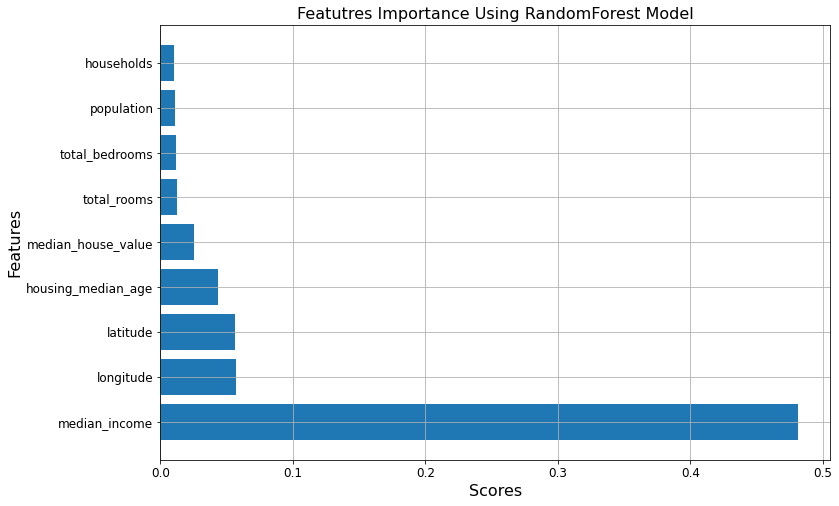

In [138]:
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)

## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutres Importance Using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

**Using XGboost**

In [139]:
#Define the model
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [147]:
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(4, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.8, 0.9]}


## Intitalize the GridSearchCV and Fit ti Data
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train, y_train) 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  7.6min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.1, max_bin=256,
                                    max_cat_to_oneh...
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
            

In [148]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}
best_xgb --  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [149]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, X=X_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')


RMSE Scores Using Tuned Tuned XGBoost --- [44371.522  46737.1266 46988.6361 44947.4442 46909.5017]
Mean of RMSE Scores Using Tuned XGBoost --- 45990.8461


In [151]:
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=X_train, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}')

RMSE after prediction Using Tuned XGBoost --- 46004.0715


In [152]:
print (f'Train accuracy :: {best_xgb.score(X_train,y_train)*100} %')
print (f'Test  accuracy :: {best_xgb.score(X_test,y_test)*100} %')

Train accuracy :: 96.10505178554149 %
Test  accuracy :: 84.34158778136947 %


**VotingRegressor**

In [156]:
voting_reg = VotingRegressor(estimators=[
                                        ('tuned_forest', best_forest), 
                                        ('tuned_xgb', best_xgb)
                                        ]
                            )

voting_reg.fit(X_train, y_train) 

VotingRegressor(estimators=[('tuned_forest',
                             RandomForestRegressor(max_depth=18,
                                                   max_samples=0.9,
                                                   n_estimators=400, n_jobs=-1,
                                                   random_state=42)),
                            ('tuned_xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
  

In [157]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_voting = cross_val_score(estimator=voting_reg, X=X_train, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  
rmse_scores_voting = -1 * rmse_scores_voting   ## we want it positive
rmse_scores_voting = np.sqrt(rmse_scores_voting)
print(f'RMSE Scores Using VotingRegressor --- {np.round(rmse_scores_voting, 4)}')
print(f'Mean of RMSE Scores Using VotingRegressor --- {rmse_scores_voting.mean():.4f}')

RMSE Scores Using VotingRegressor --- [45526.2003 48553.0405 48160.5707 45915.7224 47620.5326]
Mean of RMSE Scores Using VotingRegressor --- 47155.2133


In [159]:
y_pred_voting = cross_val_predict(estimator=voting_reg, X=X_train, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
rmse_pred_voting = np.sqrt(mean_squared_error(y_train, y_pred_voting))
print(f'RMSE after prediction Using VotingRegressor --- {rmse_pred_voting:.4f}')

RMSE after prediction Using VotingRegressor --- 47170.8168


In [160]:
print (f'Train accuracy :: {voting_reg.score(X_train,y_train)*100} %')
print (f'Test  accuracy :: {voting_reg.score(X_test,y_test)*100} %')

Train accuracy :: 96.52682993881476 %
Test  accuracy :: 83.27556629607867 %
